In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.fft import fft2, fftshift

%config InlineBackend.figure_format = "retina"

# Load presaved data

In [2]:
data = np.load("data_for_find_length_scale.npz")
x = data["x"]
y = data["y"]
modes = data["modes"]
modes = modes[0::2, 0:100]

# FFT approach

In [3]:
# scalars = modes[:, 50]
# points = np.vstack((x, y))

# x_min = np.min(x)
# y_min = np.min(y)
# x_max = np.max(x)
# y_max = np.max(y)


# Step 1: Resample data onto a regular grid
# Define grid dimensions and range
# grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
# grid_scalars = griddata(points.T, scalars, (grid_x, grid_y), method="cubic")
# grid_scalars[np.isnan(grid_scalars)] = 0

# # Step 2: Apply 2D Fourier Transform to the gridded data
# ft = fft2(grid_scalars, norm="ortho")
# ft_shifted = fftshift(ft)  # Shift zero frequency to center for visualization

# # Step 3: Calculate the power spectrum (magnitude of the Fourier coefficients)
# power_spectrum = np.abs(ft_shifted) ** 2

# # Step 4: Identify the dominant spatial frequency
# # Find the frequency with the maximum power in the spectrum
# ny, nx = power_spectrum.shape
# freq_x = np.fft.fftfreq(nx, d=(x_max - x_min) / nx)
# freq_y = np.fft.fftfreq(ny, d=(y_max - y_min) / ny)
# fx, fy = np.meshgrid(freq_x, freq_y)

# # Get indices of the maximum power value (excluding zero frequency)
# max_power_idx = np.unravel_index(np.argmax(power_spectrum[1:]), power_spectrum.shape)

# # Convert the dominant frequency to a characteristic length scale
# dominant_frequency = np.sqrt(fx[max_power_idx] ** 2 + fy[max_power_idx] ** 2)
# characteristic_length_scale = 1 / dominant_frequency

# print(f"{characteristic_length_scale=:3.5f} (deg)")

# plt.imshow(grid_scalars)
# plt.colorbar()
# plt.show()

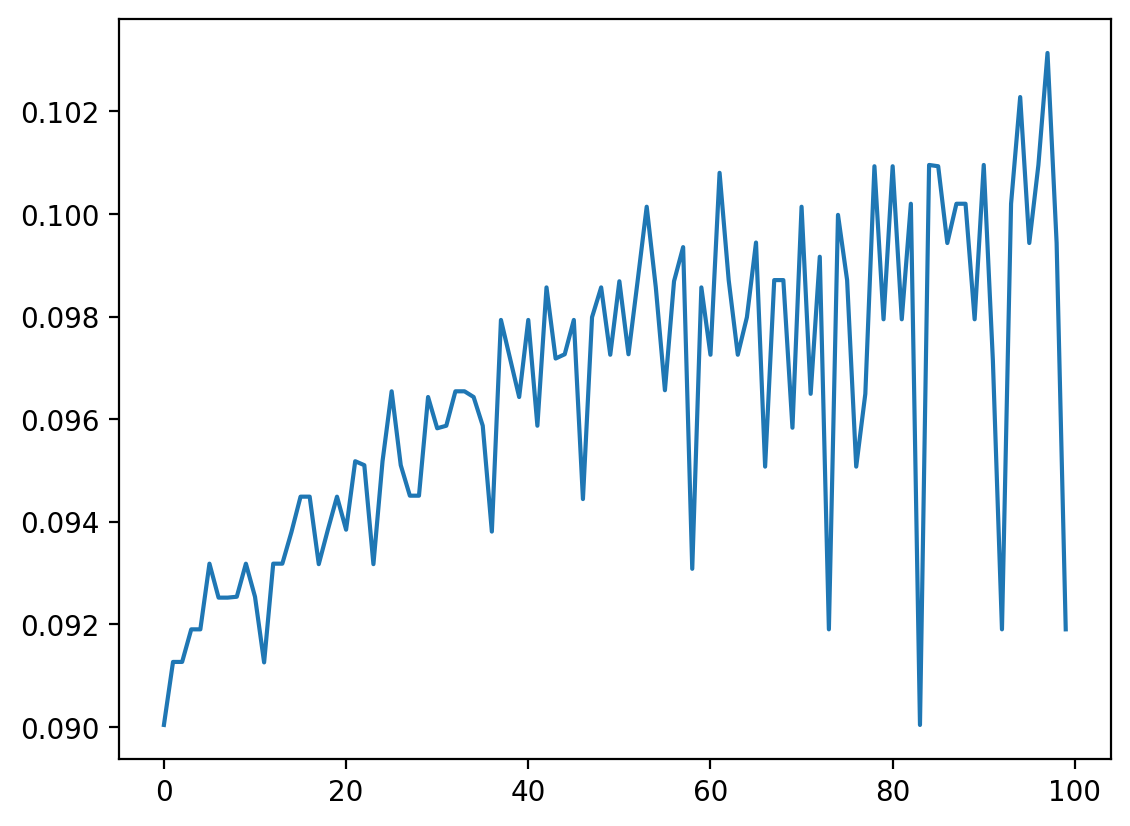

In [ ]:
def get_length_scale(x, y, scalars):

    points = np.vstack((x, y))
    x_min = np.min(x)
    y_min = np.min(y)
    x_max = np.max(x)
    y_max = np.max(y)
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

    grid_scalars = griddata(points.T, scalars, (grid_x, grid_y), method="cubic")
    grid_scalars[np.isnan(grid_scalars)] = 0

    # Step 2: Apply 2D Fourier Transform to the gridded data
    ft = fft2(grid_scalars, norm="ortho")
    ft_shifted = fftshift(ft)  # Shift zero frequency to center for visualization

    # Step 3: Calculate the power spectrum (magnitude of the Fourier coefficients)
    power_spectrum = np.abs(ft_shifted) ** 2

    # Step 4: Identify the dominant spatial frequency
    # Find the frequency with the maximum power in the spectrum
    ny, nx = power_spectrum.shape
    freq_x = np.fft.fftfreq(nx, d=(x_max - x_min) / nx)
    freq_y = np.fft.fftfreq(ny, d=(y_max - y_min) / ny)
    fx, fy = np.meshgrid(freq_x, freq_y)

    # Get indices of the maximum power value (excluding zero frequency)
    max_power_idx = np.unravel_index(
        np.argmax(power_spectrum[1:]), power_spectrum.shape
    )

    # Convert the dominant frequency to a characteristic length scale
    dominant_frequency = np.sqrt(fx[max_power_idx] ** 2 + fy[max_power_idx] ** 2)
    characteristic_length_scale = 1 / dominant_frequency

    return characteristic_length_scale


length_vec = np.zeros(100)
for i in range(0, len(length_vec)):
    length_vec[i] = get_length_scale(x, y, modes[:, i])

plt.plot(length_vec)
plt.show()